In [3]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 6.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.8 MB/s eta 0:00:00a 0:00:01


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
!pip install pandas --upgrade

In [13]:
!pip install sklearn

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [6]:
!pip install openpyxl --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.7 MB/s eta 0:00:00a 0:00:01


In [7]:
Business_account = pd.read_excel("/Users/hugo/Downloads/Business Account.xlsx")
Consumer_price_index = pd.read_excel("/Users/hugo/Downloads/consumer_price_index.xlsx")
Contacts = pd.read_excel("/Users/hugo/Downloads/Contacts.xlsx")
Data_dictionary = pd.read_excel("/Users/hugo/Downloads/Data dictionary.xlsx")
Invoice_and_opportunities = pd.read_excel("/Users/hugo/Downloads/Invoice and Opportunities.xlsx")
Non_stock_items = pd.read_excel("/Users/hugo/Downloads/Non-Stock Items.xlsx")
Items_and_opportunities = pd.read_excel("/Users/hugo/Downloads/Items and Opportunities.xlsx")
Opportunities = pd.read_excel("/Users/hugo/Downloads/Opportunities.xlsx")

In [39]:
Opportunities.columns

Index(['Business Account', 'Stage', 'Status', 'Estimated amount',
       'Amount received', 'Class ID', 'Programme financé',
       'Actual Close Date'],
      dtype='object')

In [52]:

Opportunities = Opportunities[['Business Account', 'Stage', 'Status',
                                  'Estimated amount', 'Amount received',
                                  'Class ID', 'Programme financé',
                                 'Actual Close Date']]

Opportunities.shape

(4379, 8)

In [53]:
# Count NaN values for each column
nan_counts = Opportunities.isna().sum()

# Display the number of NaN values for each column
print(nan_counts)

Business Account        1
Stage                   0
Status                  0
Estimated amount        0
Amount received      1805
Class ID                0
Programme financé    1823
Actual Close Date       0
dtype: int64


In [54]:
Opportunities = Opportunities.dropna(subset=['Actual Close Date'])

In [55]:
Opportunities.shape

(4379, 8)

In [13]:
Opportunities.shape

(4379, 8)

In [56]:
#descriptive statistics summary
Opportunities['Amount received'].describe()

count    2.574000e+03
mean     1.311397e+04
std      5.282522e+04
min      0.000000e+00
25%      6.500000e+02
50%      3.000000e+03
75%      9.000000e+03
max      1.400000e+06
Name: Amount received, dtype: float64

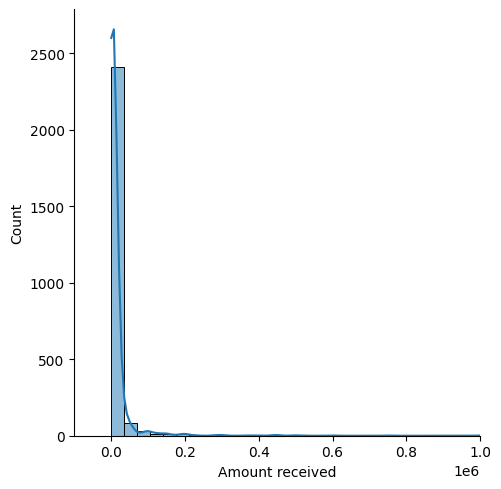

In [90]:
#histogram
sns.displot(data=Opportunities, x='Amount received', bins=40, kde=True)
plt.xlim(-100000, 1000000)  # Adjust the limits as needed
plt.show()

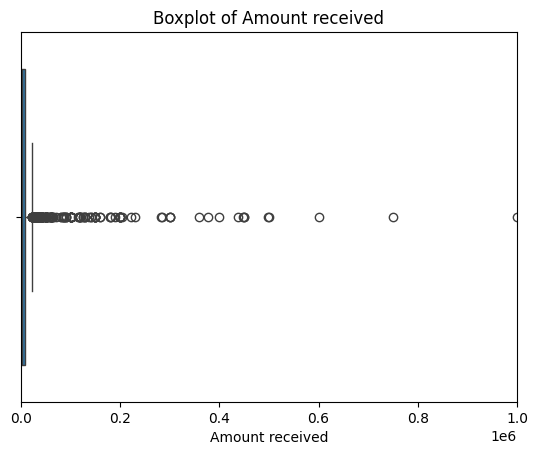

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for the 'Amount received' column
sns.boxplot(data=Opportunities, x='Amount received')
plt.xlim(0, 1000000)  # Adjust the limits as needed
plt.title("Boxplot of Amount received")
plt.show()

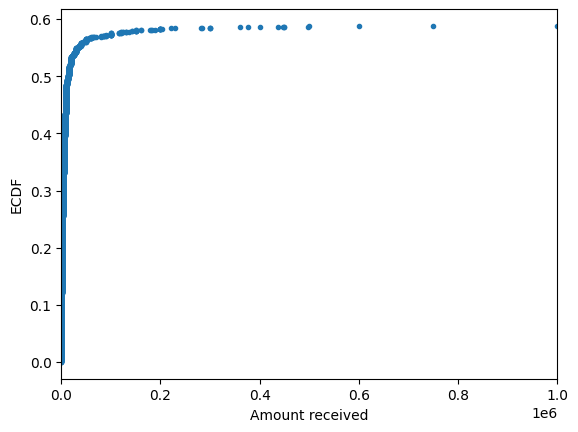

In [86]:
import numpy as np

x = np.sort(Opportunities['Amount received'])
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Amount received')
plt.ylabel('ECDF')
plt.xlim(0, 1000000)  # Adjust the limits as needed
plt.show()

In [58]:
#skewness and kurtosis
print("Skewness: %f" % Opportunities['Amount received'].skew())

#In your case, a skewness value of 11.828819 suggests that the distribution is heavily skewed to the right, 
#indicating that there may be a long tail of high values or outliers on the right side of the distribution.

print("Kurtosis: %f" % Opportunities['Amount received'].kurt())

# In your case, a kurtosis value of 194.889740 suggests that 
# the distribution has very heavy tails and a large number of extreme values or outliers.


Skewness: 13.712109
Kurtosis: 268.326501


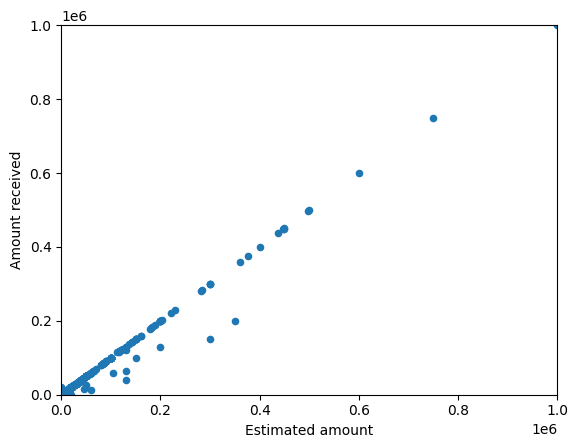

In [59]:
#scatter plot grlivarea/saleprice
var = 'Estimated amount'
data = pd.concat([Opportunities['Amount received'], Opportunities[var]], axis=1)
data.plot.scatter(x=var, y='Amount received', xlim = (0, 1000000), ylim=(0,1000000));

In [60]:
Opportunities_float = Opportunities[['Stage', 'Status',
                                  'Estimated amount', 'Amount received',
                                  'Class ID', 'Programme financé']]

In [62]:
Opportunities_float.dropna(subset=['Amount received'], inplace=True)
Opportunities_float

,Stage,Status,Estimated amount,Amount received,Class ID,Programme financé
146,Oral agreement,Won,650.0,650.00,CAMP TER,NaN
166,Oral agreement,Won,208.0,208.00,CAMP TER,NaN
167,Oral agreement,Won,56.0,56.00,CAMP TER,NaN
212,Won,Won,9000.0,9000.00,PPRIV EVNT,NaN
259,Won,Won,7620.0,7620.00,PPRIV MEC,Non fléché
...,...,...,...,...,...,...
5944,Won,Won,5000.0,5000.00,PPRIV MEC,Non fléché
5959,Won,Won,20000.0,20000.00,PPRIV MEC,L dans la Ville
5972,Won,Won,130000.0,65000.00,PPRIV MEC,NaN
5980,Won,Won,17533.0,3533.08,PPRIV MEC,Job dans la Ville


In [63]:
from datetime import datetime

unique_stage = Opportunities['Stage'].unique()
print("Unique values in 'Column1':", unique_stage)

replacement_stage = {
    'Oral agreement': 1.0,
    'Won': 2.0,
    'Advanced Prospect': 3.0,
    'Initial Prospect': 4.0,
    'Dossier posed': 5.0}

Opportunities_float['Stage'] = Opportunities_float['Stage'].replace(replacement_stage)


unique_status = Opportunities['Status'].unique()
print("Unique values in 'Column1':", unique_status)

replacement_status = {
    'Won': 1.0,
    'Lost': 0.0}

Opportunities_float['Status'] = Opportunities_float['Status'].replace(replacement_status)


unique_classid = Opportunities['Class ID'].unique()
print("Unique values in 'Column1':", unique_classid)

replacement_classid = {
            'CAMP TER': 1.0,
            'PPRIV EVNT': 2.0,
            'PPRIV MEC': 3.0,
            'CAMP EVT': 4.0,
            'PPUB': 5.0,
            'CAMP SAL': 6.0,
             'PPRIV TA': 7.0}

Opportunities_float['Class ID'] = Opportunities_float['Class ID'].replace(replacement_classid)


unique_progfi = Opportunities['Programme financé'].unique()
print("Unique values in 'Column1':", unique_progfi)

replacement_progfi = {
    np.nan: 0.0,  # Replace NaN with 0.0
    'Non fléché': 1.0,
    'Job dans la Ville': 2.0,
    'Entrepreneurs dans la Ville': 3.0,
    'Séjours et Camps': 4.0,
    'L dans la Ville': 5.0,
    'Sport': 6.0,
    'Sport, Job dans la Ville': 7.0,
    'L dans la Ville, Séjours et Camps': 8.0,
    'Réussite dans la Ville': 9.0,
    'Job dans la Ville, L dans la Ville': 10.0,
    'Job dans la Ville, Entrepreneurs dans la Ville': 11.0,
    'Non fléché, Réussite dans la Ville': 12.0,
    'Sport, Job dans la Ville, L dans la Ville': 13.0,
    'Sport, Job dans la Ville, Séjours et Camps': 14.0,
    'Sport, Job dans la Ville, Réussite dans la Ville': 15.0,
    'Job dans la Ville, L dans la Ville, Entrepreneurs dans la Ville': 16.0,
    'Non fléché, Sport': 17.0,
    'Sport, Entrepreneurs dans la Ville': 18.0,
    'Non fléché, Sport, Job dans la Ville, L dans la Ville': 19.0,
    'Réussite dans la Ville, Séjours et Camps': 20.0,
    'Non fléché, Job dans la Ville': 21.0,
    'Non fléché, Sport, Job dans la Ville': 22.0
}

Opportunities_float['Programme financé'] = Opportunities_float['Programme financé'].replace(replacement_progfi)


Opportunities_float

Unique values in 'Column1': ['Won' 'Oral agreement' 'Lost' 'Advanced Prospect' 'Initial Prospect'
 'Dossier posed']
Unique values in 'Column1': ['Won' 'Lost']
Unique values in 'Column1': ['CAMP TER' 'CAMP SAL' 'PPRIV EVNT' 'PPUB' 'PPRIV MEC' 'CAMP EVT'
 'PPRIV TA' 'PPRIV DONN' 'PPRIV MCOM']
Unique values in 'Column1': [nan 'Non fléché' 'Job dans la Ville' 'Séjours et Camps'
 'Entrepreneurs dans la Ville' 'L dans la Ville' 'Sport'
 'Sport, Job dans la Ville' 'L dans la Ville, Séjours et Camps'
 'Réussite dans la Ville' 'Job dans la Ville, L dans la Ville'
 'Job dans la Ville, Entrepreneurs dans la Ville'
 'Non fléché, Réussite dans la Ville'
 'Sport, Job dans la Ville, L dans la Ville'
 'Sport, Job dans la Ville, Séjours et Camps'
 'Sport, Job dans la Ville, Réussite dans la Ville'
 'Job dans la Ville, L dans la Ville, Entrepreneurs dans la Ville'
 'Non fléché, Sport' 'Sport, Entrepreneurs dans la Ville'
 'Non fléché, Sport, Job dans la Ville, L dans la Ville'
 'Réussite dans la Ville, 

,Stage,Status,Estimated amount,Amount received,Class ID,Programme financé
146,1.0,1.0,650.0,650.00,1.0,0.0
166,1.0,1.0,208.0,208.00,1.0,0.0
167,1.0,1.0,56.0,56.00,1.0,0.0
212,2.0,1.0,9000.0,9000.00,2.0,0.0
259,2.0,1.0,7620.0,7620.00,3.0,1.0
...,...,...,...,...,...,...
5944,2.0,1.0,5000.0,5000.00,3.0,1.0
5959,2.0,1.0,20000.0,20000.00,3.0,5.0
5972,2.0,1.0,130000.0,65000.00,3.0,0.0
5980,2.0,1.0,17533.0,3533.08,3.0,2.0


In [35]:
lst = []

for i in range(len(Opportunities_float['Actual Close Date'])):
    lst.append(reference_date - pd.to_datetime(Opportunities_float['Actual Close Date'].values[i]).to_pydatetime().date())
    
Opportunities_float['Actual Close Date'] = lst

Opportunities_float

TypeError: dtype timedelta64[ns] cannot be converted to datetime64[ns]

In [82]:
Opportunities_float

,Stage,Status,Estimated amount,Amount received,Class ID,Programme financé
146,1.0,1.0,650.0,650.00,1.0,0.0
166,1.0,1.0,208.0,208.00,1.0,0.0
167,1.0,1.0,56.0,56.00,1.0,0.0
212,2.0,1.0,9000.0,9000.00,2.0,0.0
259,2.0,1.0,7620.0,7620.00,3.0,1.0
...,...,...,...,...,...,...
5944,2.0,1.0,5000.0,5000.00,3.0,1.0
5959,2.0,1.0,20000.0,20000.00,3.0,5.0
5972,2.0,1.0,130000.0,65000.00,3.0,0.0
5980,2.0,1.0,17533.0,3533.08,3.0,2.0


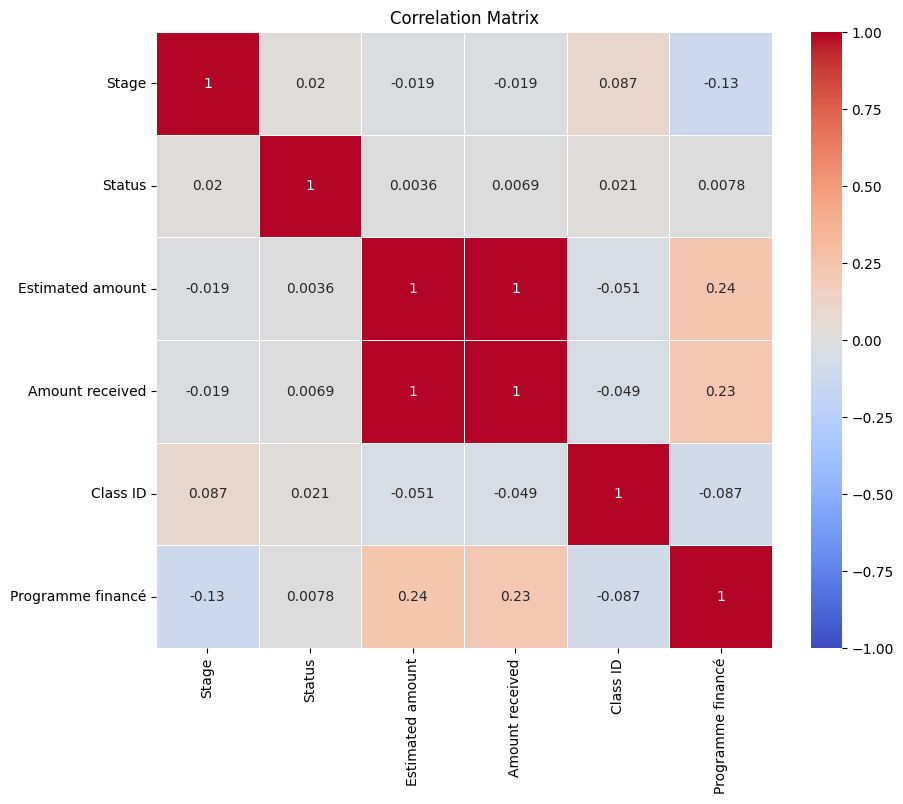

In [83]:
correlation_matrix = Opportunities_float.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [28]:
Opportunities_float['Actual Close Date'] = Opportunities_float['Actual Close Date'].apply(lambda x: x.days)

AttributeError: 'int' object has no attribute 'days'

In [29]:
Opportunities_float

,Stage,Status,Estimated amount,Amount received,Class ID,Programme financé,Actual Close Date
22,2.0,1.0,150.0,NaN,1.0,0.0,9
49,2.0,1.0,756.0,NaN,6.0,0.0,10
106,2.0,1.0,455.0,NaN,6.0,0.0,11
146,1.0,1.0,650.0,650.0,1.0,0.0,9
166,1.0,1.0,208.0,208.0,1.0,0.0,9
...,...,...,...,...,...,...,...
5981,2.0,1.0,1059.0,NaN,3.0,1.0,310
5982,2.0,1.0,7500.0,7500.0,3.0,2.0,702
5983,2.0,1.0,35000.0,NaN,3.0,2.0,945
5984,2.0,1.0,20000.0,NaN,3.0,4.0,786


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
Opportunities_float

,Stage,Status,Estimated amount,Amount received,Class ID,Programme financé
146,1.0,1.0,650.0,650.00,1.0,0.0
166,1.0,1.0,208.0,208.00,1.0,0.0
167,1.0,1.0,56.0,56.00,1.0,0.0
212,2.0,1.0,9000.0,9000.00,2.0,0.0
259,2.0,1.0,7620.0,7620.00,3.0,1.0
...,...,...,...,...,...,...
5944,2.0,1.0,5000.0,5000.00,3.0,1.0
5959,2.0,1.0,20000.0,20000.00,3.0,5.0
5972,2.0,1.0,130000.0,65000.00,3.0,0.0
5980,2.0,1.0,17533.0,3533.08,3.0,2.0


In [69]:

# Load your dataframe or create it
# For this example, let's assume you have a dataframe called 'Opportunities' with the necessary columns.
# 'Stage', 'Status', 'Estimated amount', 'Class ID', 'Programme financé' are the features.
# 'Amount received' is the target variable you want to predict.

# Split the data into features (X) and the target variable (y)
X = Opportunities_float[['Stage', 'Status', 'Estimated amount', 'Class ID', 'Programme financé']]
y = Opportunities_float['Amount received']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can also access the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 18250234.679100018
R-squared: 0.9861081699349731
Coefficients: [-1.10181269e+02  6.40262885e+03  9.83173200e-01  4.29711735e+01
 -1.66885432e+02]
Intercept: -6249.339113244569


Mean Squared Error: 18248303.230559688
R-squared: 0.9861096401272952
Coefficients: [-102.65776824    0.98318169   45.20924793 -165.55111866]
Intercept: 121.65820436512513


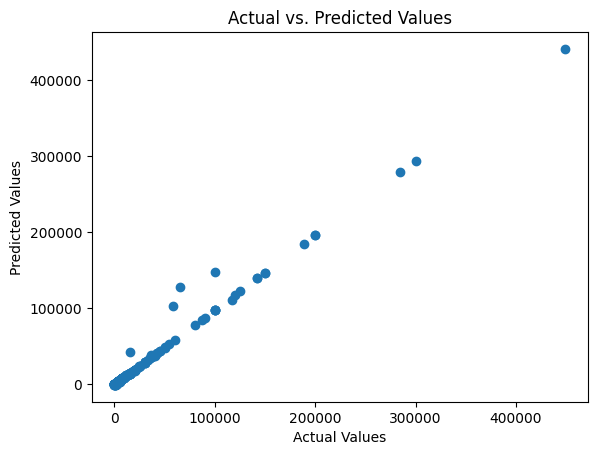

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataframe or create it
# For this example, let's assume you have a dataframe called 'Opportunities' with the necessary columns.
# 'Stage', 'Status', 'Estimated amount', 'Class ID', 'Programme financé' are the features.
# 'Amount received' is the target variable you want to predict.

# Split the data into features (X) and the target variable (y)
X = Opportunities_float[['Stage', 'Estimated amount', 'Class ID', 'Programme financé']]
y = Opportunities_float['Amount received']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model with a regularization parameter alpha
alpha = 1.0  # You can adjust the alpha value for stronger or weaker regularization
ridge_model = Ridge(alpha=alpha)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can also access the model's coefficients and intercept
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)


import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

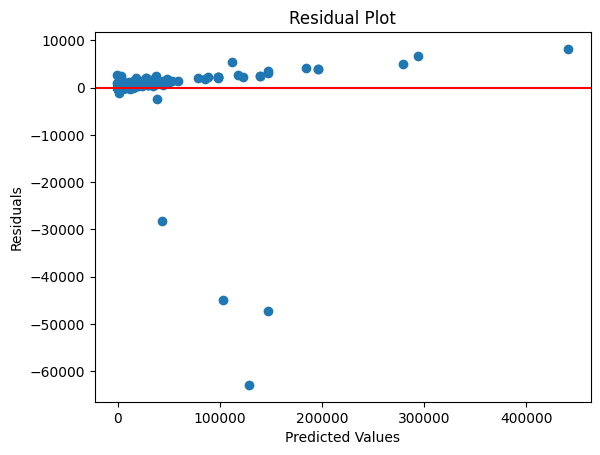

In [77]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()

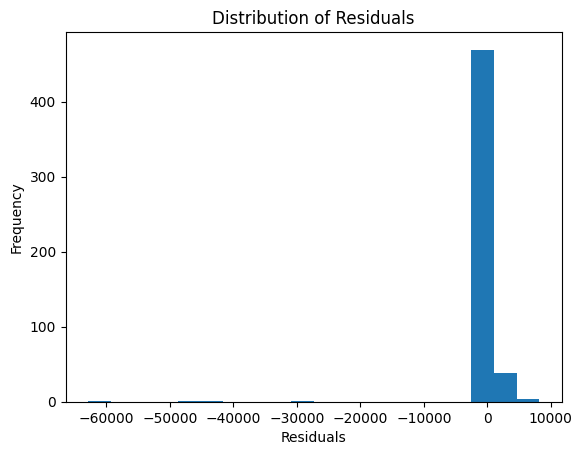

In [78]:
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

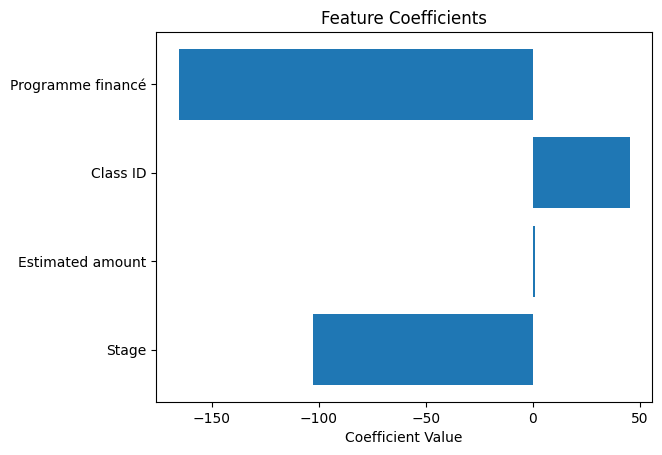

In [79]:
import numpy as np

feature_names = X.columns
coefficients = ridge_model.coef_
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.title("Feature Coefficients")
plt.show()

In [81]:
Opportunitiess = pd.read_excel("/Users/hugo/Downloads/Opportunities.xlsx")

unique_progfi = Opportunitiess['Class'].unique()
print("Unique values in 'Column1':", unique_progfi)

Unique values in 'Column1': ['Private partnership - Event' 'Private partnership - Patronage'
 'Campus - Room' 'Campus - Field' 'Public partnership' 'Campus - Event'
 'Private partnership - Donation in kind'
 'Private partnership - Skill sponsorship'
 'Private partnership - Apprenticeship tax']
